In [75]:
import FuzzySystem as fs
from FuzzySystem.FuzzySet import  FuzzySet
from FuzzySystem.FuzzyVariable import  FuzzyVariable
from FuzzySystem.FuzzyInferenceSystem import  FuzzyInferenceSystem, Antecedent,Consequent, FuzzyRule 
from FuzzySystem.Defuzzifier import Centroid
from FuzzySystem.MembershipFunction import Trimf, Gaussmf, GBellmf, Logmf, Tanhmf, Trapmf, Sigmoidmf, Cauchymf

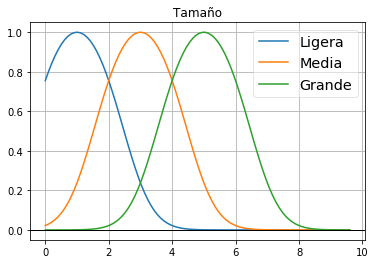

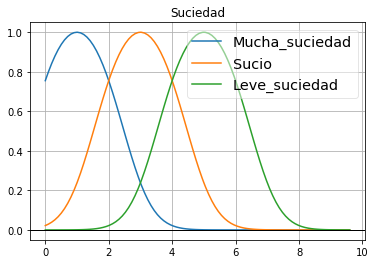

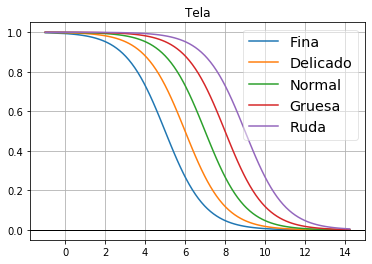

In [44]:
#INPUTS

#tamaño
tam_lig = FuzzySet('Ligera', Tanhmf([2,1]))
tam_med = FuzzySet('Media', Tanhmf([2,3]))
tam_gra = FuzzySet('Grande', Tanhmf([2,5]))

tam = FuzzyVariable('Tamaño', [tam_lig, tam_med,tam_gra], universe = [0,10])
tam.show()

#suciedad
suc_dem = FuzzySet('Mucha_suciedad', Tanhmf([2,1]))
suc_nor = FuzzySet('Sucio', Tanhmf([2,3]))
suc_lev = FuzzySet('Leve_suciedad', Tanhmf([2,5]))

suc = FuzzyVariable('Suciedad', [suc_dem,suc_nor,suc_lev], universe = [0,10])
suc.show()

#catalogo
tela_fina = FuzzySet('Fina',Sigmoidmf([-1,5]))
tela_del = FuzzySet('Delicado', Sigmoidmf([-1,6]))
tela_normal = FuzzySet('Normal',Sigmoidmf([-1,7]))
tela_gruesa = FuzzySet('Gruesa', Sigmoidmf([-1,8]))
tela_ruda = FuzzySet('Ruda',Sigmoidmf([-1,9])) 

tela =FuzzyVariable('Tela', [tela_fina, tela_del,tela_normal, tela_gruesa
                             , tela_ruda],universe = [0,15])
tela.show()

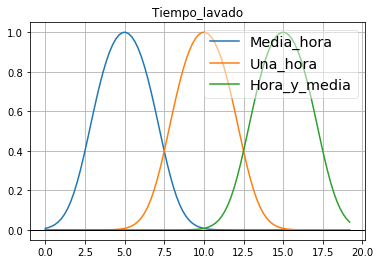

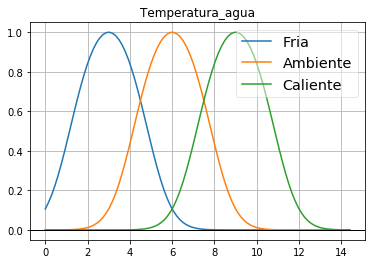

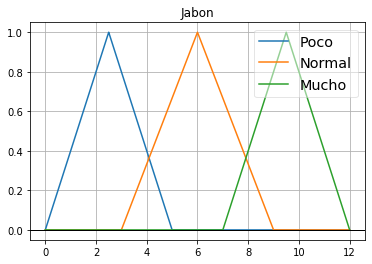

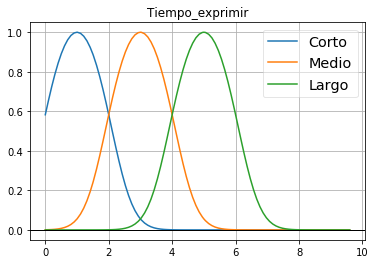

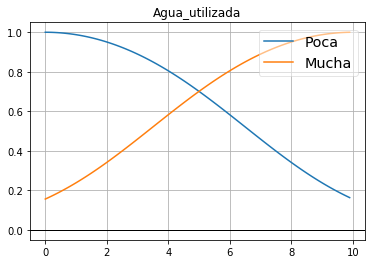

In [78]:
#output

#TIEMPO: de media a hora y media horas para lavar
lav_cor = FuzzySet('Media_hora', Tanhmf([3,5]))
lav_nor = FuzzySet('Una_hora', Tanhmf([3,10]))
lav_muc = FuzzySet('Hora_y_media', Tanhmf([3,15]))

lav = FuzzyVariable('Tiempo_lavado',[lav_cor,lav_nor,lav_muc], universe = [0,20])
lav.show()

#TEMPERATURA:  debe ser de0-20-30 grados
temp_f = FuzzySet('Fria',Tanhmf([2.5,3]))
temp_a = FuzzySet('Ambiente',Tanhmf([2.5,6]))
temp_c = FuzzySet('Caliente',Tanhmf([2.5,9]))

temp = FuzzyVariable('Temperatura_agua',[temp_f,temp_a,temp_c], universe = [0,15])
temp.show()


#Jabonde 50 a 100 ml dependiendo de temp agua y suciedad
jab_poc = FuzzySet('Poco',Trimf([0,2.5,5]))
jab_nor = FuzzySet('Normal',Trimf([3,6,9]))
jab_muc = FuzzySet('Mucho',Trimf([7,9.5,12]))

jab = FuzzyVariable('Jabon',[jab_poc,jab_nor,jab_muc], universe = [0,13])
jab.show()

#TIEMPO DE EXPRIMIR
expr_c = FuzzySet('Corto',Tanhmf([1.5,1]))
expr_m = FuzzySet('Medio',Tanhmf([1.5,3]))
expr_l = FuzzySet('Largo',Tanhmf([1.5,5]))

expr = FuzzyVariable('Tiempo_exprimir',[expr_c,expr_m,expr_l],universe = [0,10])
expr.show()

#AGUA 
agua_p = FuzzySet('Poca', Tanhmf([9,0]))
agua_m = FuzzySet('Mucha', Tanhmf([9,10]))

agua = FuzzyVariable('Agua_utilizada',[agua_p,agua_m], universe = [0,10])
agua.show()

In [79]:
#RULES
#poca agua
ant0  = Antecedent(tela['Fina'] & suc['Sucio'] & tam['Ligera'])
cont0 = Consequent([lav['Media_hora'], temp['Ambiente'], jab['Poco']])
rule0 = FuzzyRule(ant0, cont0)

ant1  = Antecedent(tela['Normal'] & suc['Leva_suciedad'] & tam['Ligera'])
cont1 = Consequent([lav['Una_hora'], temp['Ambiente'], jab['Poco']])
rule1 = FuzzyRule(ant1, cont1)

#minimizar energia
ant2  = Antecedent(tela['Normal'] & suc['Sucio'] & tam['Ligera'])
cont2 = Consequent([lav['Una_hora'], temp['Ambiente'], jab['Normal'],
                   temp['Fria'],agua['Mucha']])
rule2 = FuzzyRule(ant2, cont2)
                  
#evitar daño de la ropa
ant3  = Antecedent(tela['Fina'] & suc['Leve_suciedad'] & tam['Media'])
cont3 = Consequent([lav['Una_hora'], temp['Fria'], jab['Poco'], agua['Mucha']])
rule3 = FuzzyRule(ant3, cont3)
                  
#detergente
ant4  = Antecedent(tela['Normal'] & suc['Leve_suciedad'] & tam['Media'])
cont4 = Consequent([lav['Una_hora'], temp['Fria'], jab['Poco'], agua['Mucha']])
rule4 = FuzzyRule(ant4, cont4)
                  
#Tiempo
ant5  = Antecedent(tela['Normal'] & suc['Leva_suciedad'] & tam['Media'])
cont5 = Consequent([lav['Media_hora'], temp['Ambiente'], jab['Poco'], agua['Mucha']])
rule5 = FuzzyRule(ant5, cont5)

In [80]:
#Sistema de inferencia

fis = FuzzyInferenceSystem([rule1, rule2, rule3, rule4, rule5], and_op='prod', or_op='sum')

inputs = {'ropa':4,'suciedad':3,'carga':5}
result = fis.eval(inputs)
result.show()


Evaluation of FIS with inputs:
ropa: 4
suciedad: 3
carga: 5


KeyError: 'Tela'

In [81]:
Centroid(result).eval()

NameError: name 'result' is not defined

In [ ]:
from FuzzySystem.Defuzzifier import  CenterOfSets, FirstOfMaximum, LastOfMaximum, LastOfMaximum, ModifiedHeights, Heights, MeanOfMaximum

Defuzzification_methods = [Centroid,CenterOfSets,  Heights, ModifiedHeights, MeanOfMaximum, LastOfMaximum, FirstOfMaximum]

for dm in Defuzzification_methods:
    print(dm.name)
    print("{:>5}\n".format(str(dm(result).eval())))

In [ ]:
from FuzzySystem.NonSingleton import NonSingleton
import numpy as np

nsinp1_values = np.linspace(0,10,50)
nsinp1 = NonSingleton(Gaussmf([2,5]), nsinp1_values)

nsinp2_values = np.linspace(0,10,50)
nsinp2 = NonSingleton(Gaussmf([2,5]), nsinp2_values)

nsinp3_values = np.linspace(0,10,50)
nsinp3 = NonSingleton(Gaussmf([2,5]), nsinp3_values)

nsinputs = {'carga':nsinp1, 'ropa':nsinp2, 'suciedad':nsinp3}

result = fis.eval(nsinputs)result.show(Centroid)

In [82]:
result.show(Centroid)

NameError: name 'result' is not defined

In [83]:
fis.matrix_rules

[[('Tela', 'Normal and None'),
  ('Tamaño', 'Ligera'),
  ('Tiempo_lavado', 'Una_hora'),
  ('Temperatura_agua', 'Ambiente'),
  ('Jabon', 'Poco'),
  ('weight', 1)],
 [('Tela', 'Normal and Suciedad', 'Sucio'),
  ('Tamaño', 'Ligera'),
  ('Tiempo_lavado', 'Una_hora'),
  ('Temperatura_agua', 'Ambiente'),
  ('Jabon', 'Normal'),
  ('Temperatura_agua', 'Fria'),
  ('Agua_utilizada', 'Mucha'),
  ('weight', 1)],
 [('Tela', 'Fina and Suciedad', 'Leve_suciedad'),
  ('Tamaño', 'Media'),
  ('Tiempo_lavado', 'Una_hora'),
  ('Temperatura_agua', 'Fria'),
  ('Jabon', 'Poco'),
  ('Agua_utilizada', 'Mucha'),
  ('weight', 1)],
 [('Tela', 'Normal and Suciedad', 'Leve_suciedad'),
  ('Tamaño', 'Media'),
  ('Tiempo_lavado', 'Una_hora'),
  ('Temperatura_agua', 'Fria'),
  ('Jabon', 'Poco'),
  ('Agua_utilizada', 'Mucha'),
  ('weight', 1)],
 [('Tela', 'Normal and None'),
  ('Tamaño', 'Media'),
  ('Tiempo_lavado', 'Media_hora'),
  ('Temperatura_agua', 'Ambiente'),
  ('Jabon', 'Poco'),
  ('Agua_utilizada', 'Mucha'),
 